In [1]:
#Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
 
import sklearn 
from sklearn.model_selection import train_test_split  , KFold , cross_val_score,  GridSearchCV
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r"F:\Data Science\Assignments\14. Decision Tree\Company_Data.csv")
data.head() 

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [4]:
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [5]:
#categorical_features

categorical_features = [feature for feature in data.columns if data[feature].dtypes == 'O']
print('categorical_features:', categorical_features) 

categorical_features: ['ShelveLoc', 'Urban', 'US']


In [6]:
numeric_features = [feature for feature in data.columns if data[feature].dtypes != 'O']
print('numeric features:', numeric_features, '\n') 

numeric features: ['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age', 'Education'] 



# Feature Engineering

Converting sales into categorical feature we will make 3 categories in sales like low, medium and good sales.

<AxesSubplot:xlabel='Sales', ylabel='Count'>

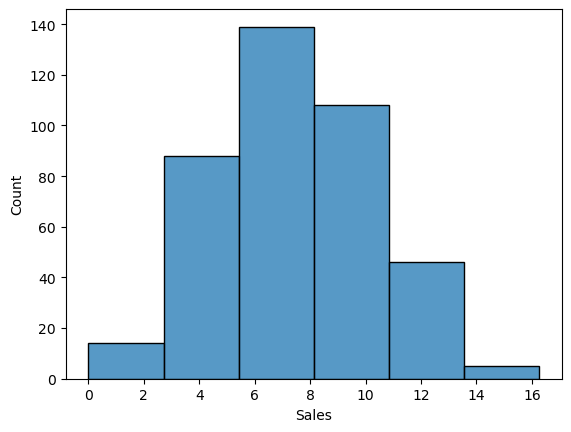

In [7]:
sns.histplot(data.Sales,bins=6)

In [8]:
data.Sales.max() / 3 

# diving by 3 since we are making 3 categories
# each category with width 5.42

5.423333333333333

In [9]:
data1 = data.copy()
data1['Sales_category'] = pd.cut(x = data1['Sales'], bins = [0, 5.5 ,11, 17], labels=['Low','Medium','High'], right = False)
data1 = data1.drop(columns=['Sales'])
     

In [10]:
data1.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_category
0,138,73,11,276,120,Bad,42,17,Yes,Yes,Medium
1,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,113,35,10,269,80,Medium,59,12,Yes,Yes,Medium
3,117,100,4,466,97,Medium,55,14,Yes,Yes,Medium
4,141,64,3,340,128,Bad,38,13,Yes,No,Low


# Visualization

<AxesSubplot:xlabel='Sales_category', ylabel='count'>

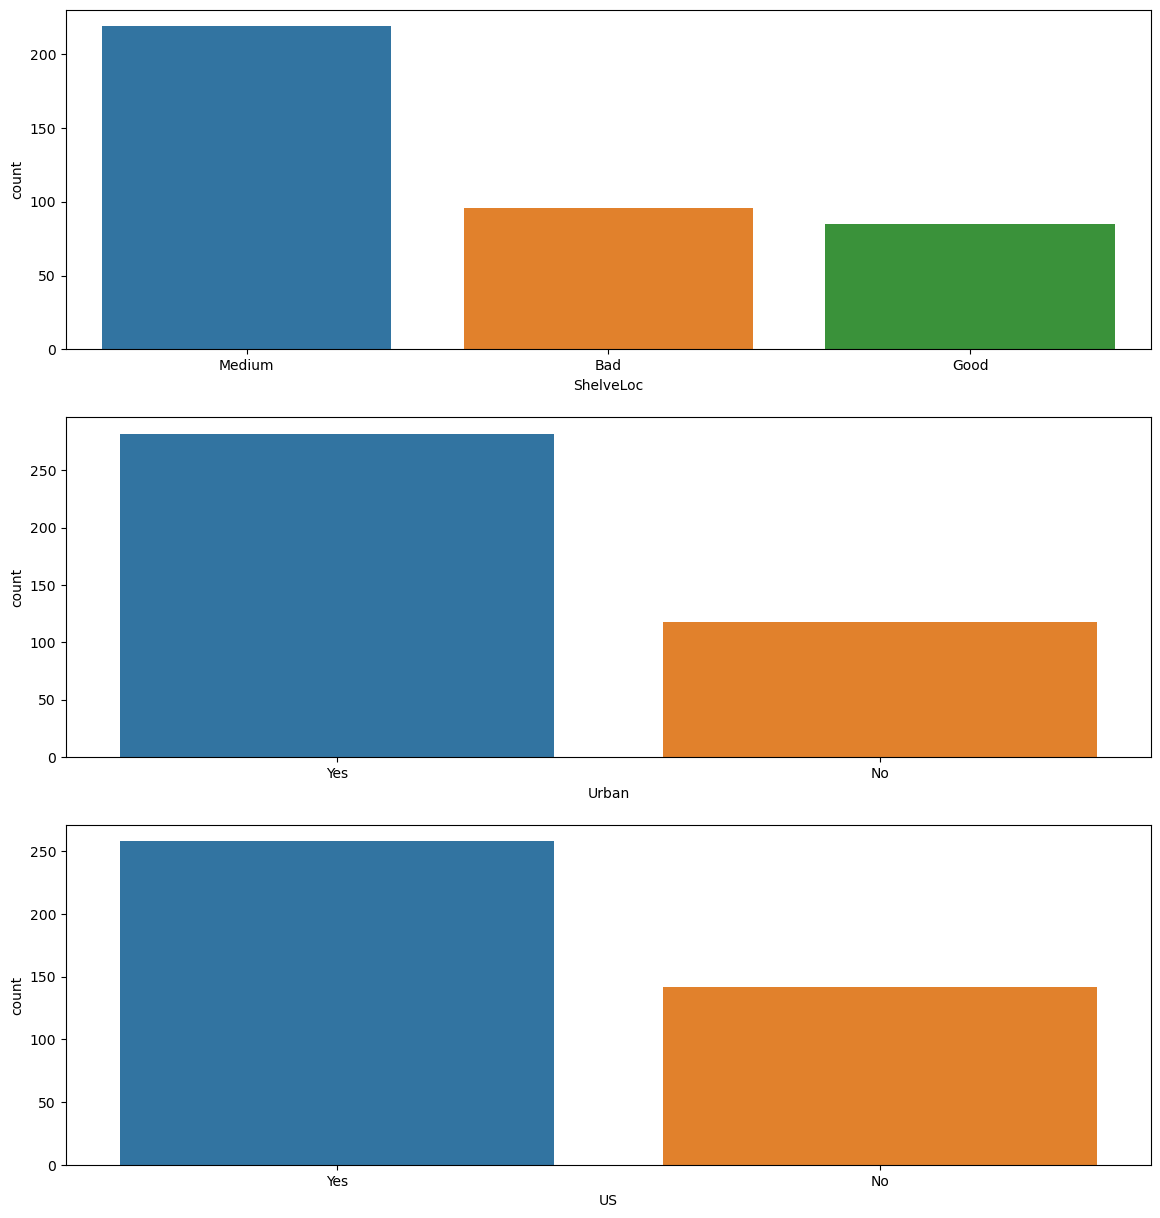

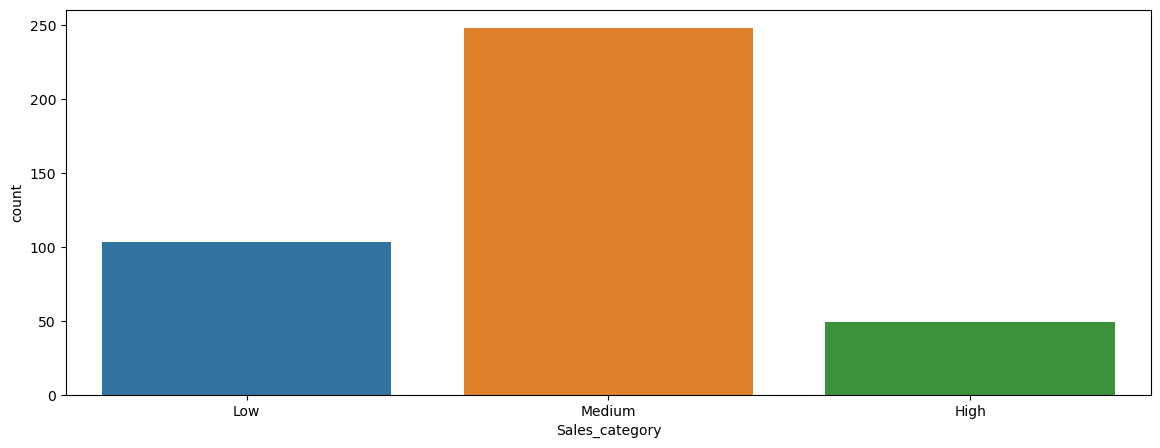

In [11]:
# for categorical_features -- barplot
fig, axes=plt.subplots(len(categorical_features),1,figsize=(14,15))

for i in range (0, len(categorical_features)):
    sns.countplot(data[categorical_features[i]],ax=axes[i], order=data[categorical_features[i]].value_counts().index)

plt.figure(figsize=(14,5))
sns.countplot(data1['Sales_category'])

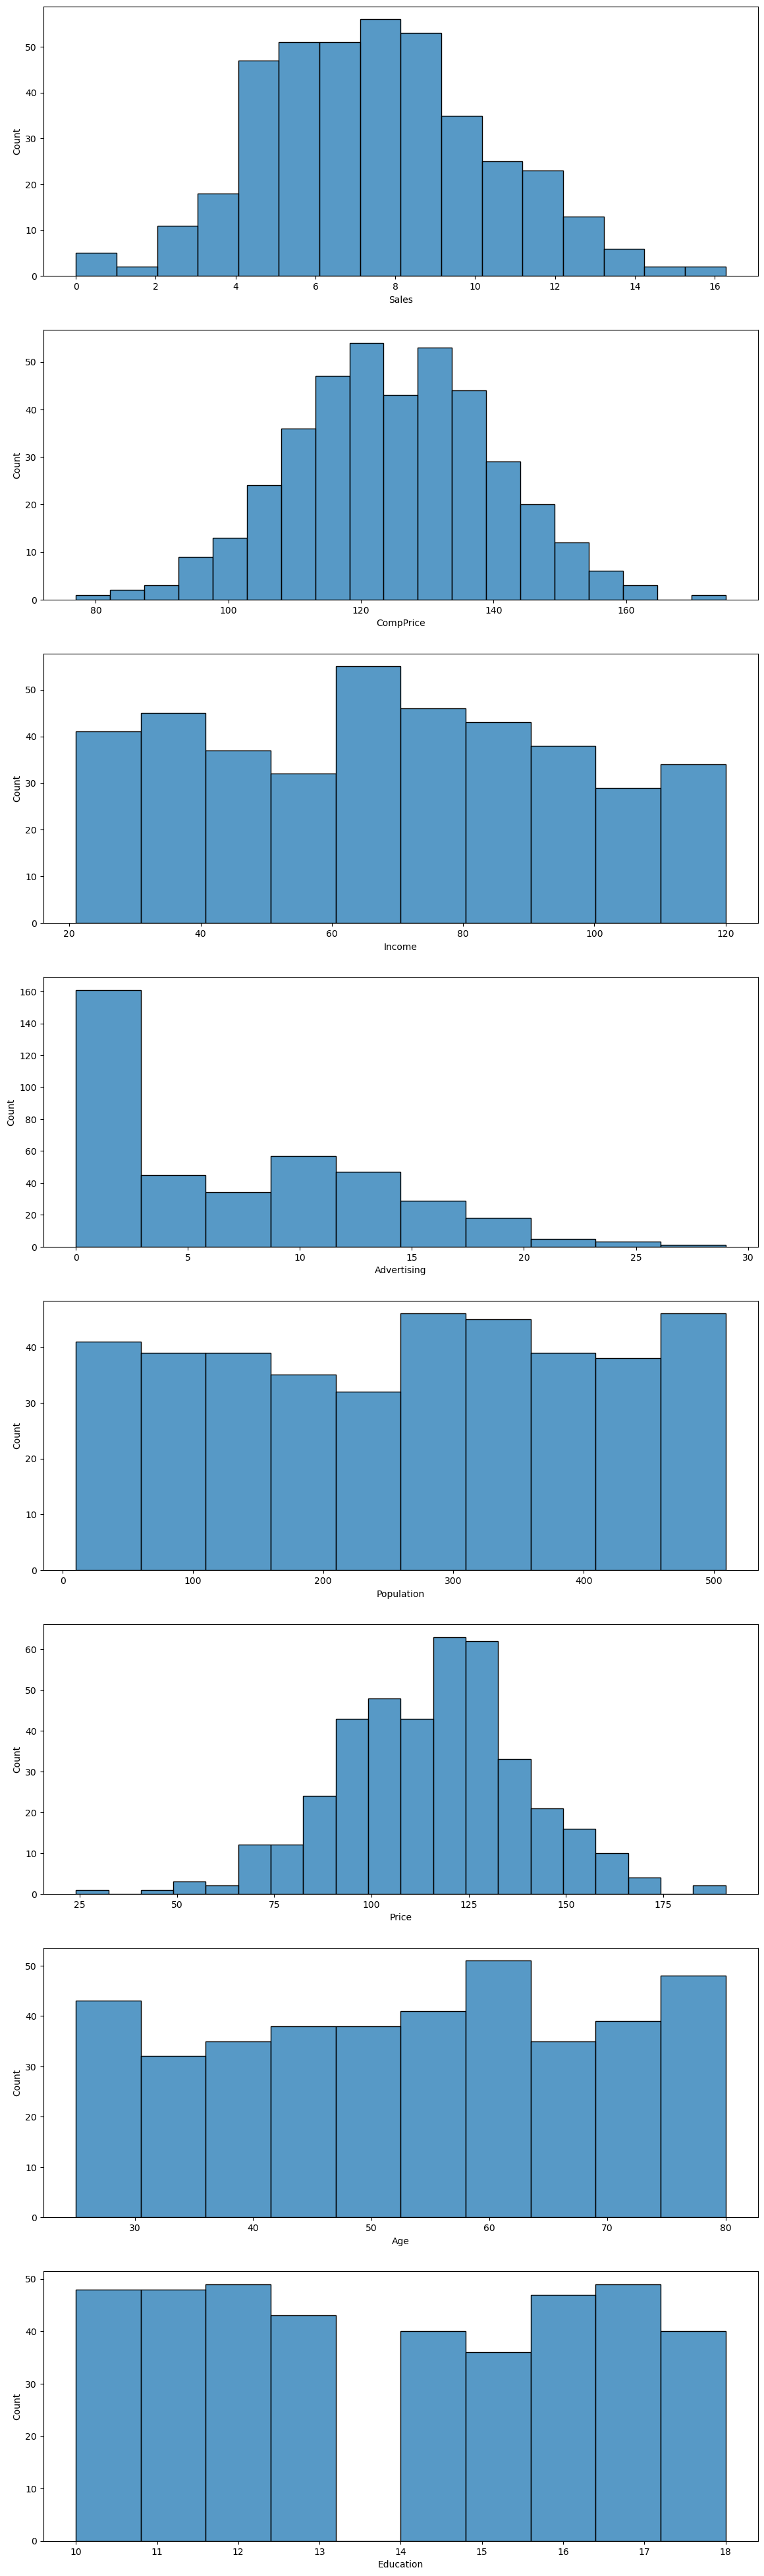

In [12]:
# for numerical_features -- histogram
fig, axes=plt.subplots(len(numeric_features),1,figsize=(14,50))

for i in range (0, len(numeric_features)):
    sns.histplot(data[numeric_features[i]],ax=axes[i])

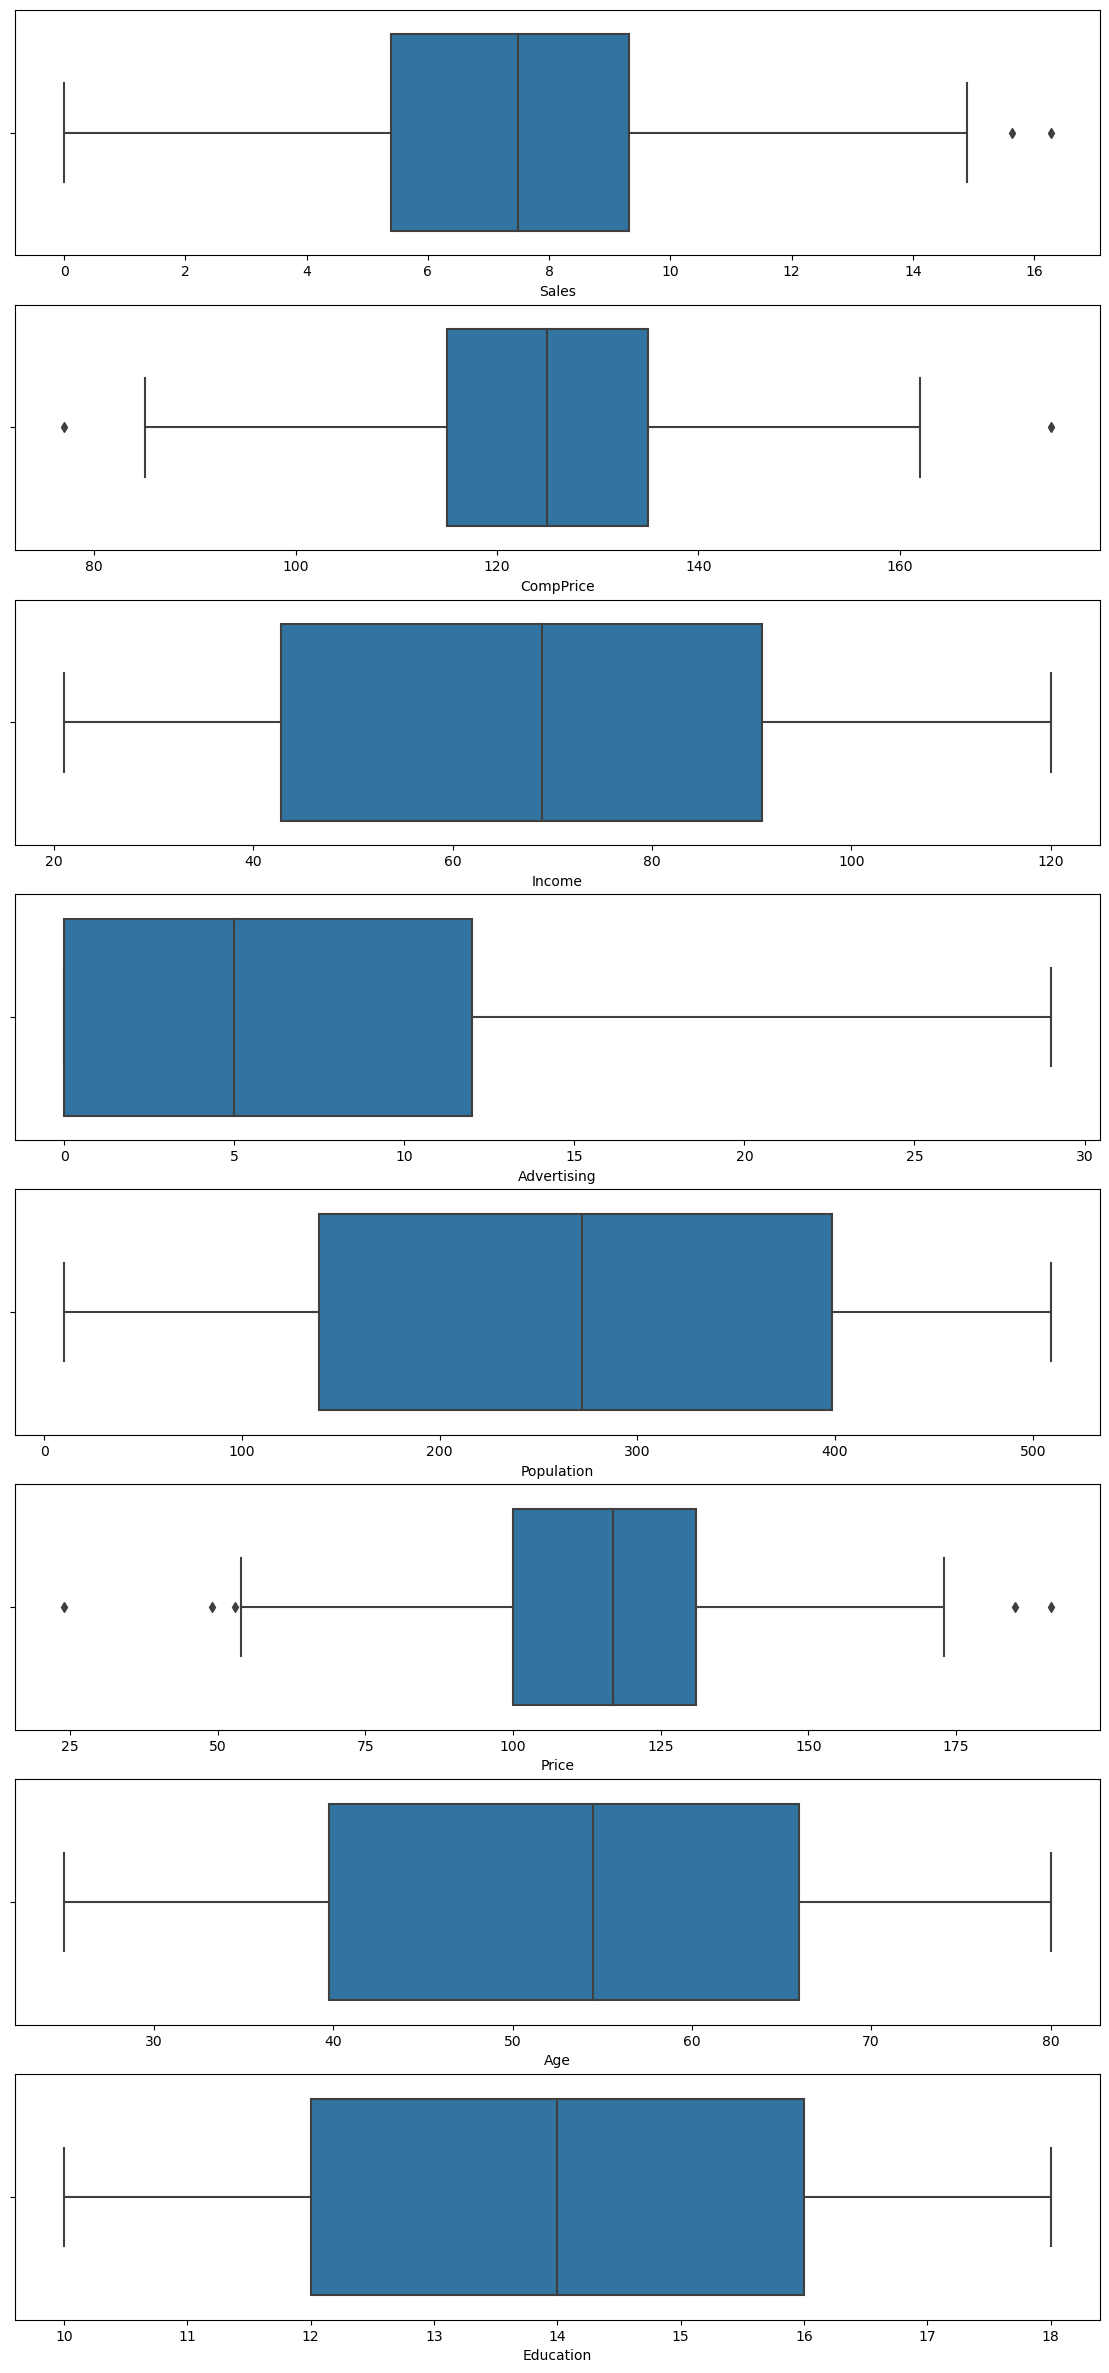

In [13]:
# Boxplot for outlier detection

fig, axes=plt.subplots(len(numeric_features),1,figsize=(14,30))

for i in range (0, len(numeric_features)):
    sns.boxplot(data[numeric_features[i]],ax=axes[i])

In [14]:
data2 = data1.copy()

for feature in numeric_features:
    Q1,Q3 = np.percentile(data[feature], [25,75])
    IQR = Q3 - Q1
    ul = Q3+1.5*IQR
    ll = Q1-1.5*IQR
    outliers = data[feature][(data[feature] < ll) |  (data[feature] > ul)]
    
    data2=data2.drop(outliers.index[:] , errors="ignore")
    
    outliers=0 

In [15]:
data1.shape

(400, 11)

In [16]:
data2.shape

(392, 11)

8 outliers dropped

# Data Pre-Processing

In [17]:

y = data2['Sales_category']
x= data2.drop(['Sales_category'], axis=1)  

In [18]:
x = pd.get_dummies(x) # encoding input categorical variables 

In [19]:
le = LabelEncoder()
y = le.fit_transform(y) # encoding output categorical variables

In [20]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

In [21]:
print("Shape of X_train: ",x_train.shape)
print("Shape of X_test: ", x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape) 

Shape of X_train:  (313, 14)
Shape of X_test:  (79, 14)
Shape of y_train:  (313,)
Shape of y_test (79,)


# Feature selection

Feature selection

In [22]:
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest, chi2 

In [23]:
# feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(x, y) 
     

In [24]:
# summarize scores
scores = fit.scores_
features = fit.transform(x) 

In [25]:
score_df = pd.DataFrame(list(zip(scores, x.columns)),
               columns =['Score', 'Feature'])
score_df.sort_values(by="Score", ascending=False, inplace=True)
score_df 

,Score,Feature
4,193.077575,Price
2,131.019973,Advertising
5,93.806019,Age
8,69.563239,ShelveLoc_Good
1,63.584603,Income
7,47.066783,ShelveLoc_Bad
3,32.699398,Population
9,12.340114,ShelveLoc_Medium
12,6.672444,US_No
0,4.655268,CompPrice


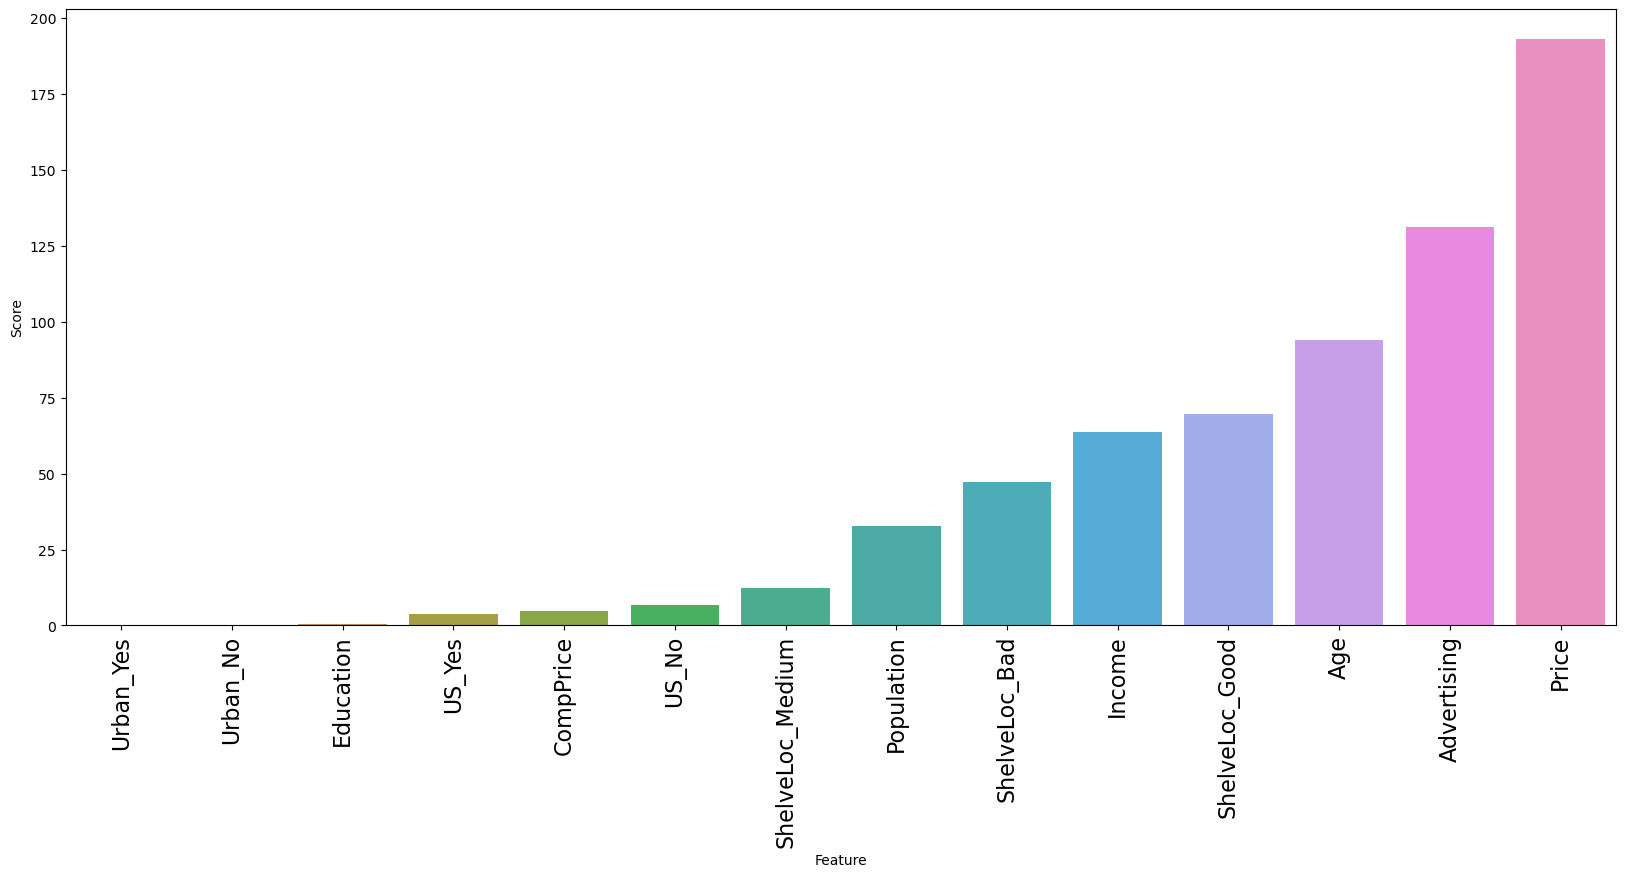

In [26]:
plt.figure(figsize=(20,8))
sns.barplot(x='Feature', y="Score", data=score_df, order=score_df.sort_values('Score').Feature) 
plt.xticks(rotation = 90, fontsize = 16)
plt.show()

In [27]:
model_data_x = x[['Price','Advertising','Population','Income','Age','ShelveLoc_Good','ShelveLoc_Bad',
                  'ShelveLoc_Medium', 'US_No','CompPrice']]

In [28]:
model_data_x 

,Price,Advertising,Population,Income,Age,ShelveLoc_Good,ShelveLoc_Bad,ShelveLoc_Medium,US_No,CompPrice
0,120,11,276,73,42,0,1,0,0,138
1,83,16,260,48,65,1,0,0,0,111
2,80,10,269,35,59,0,0,1,0,113
3,97,4,466,100,55,0,0,1,0,117
4,128,3,340,64,38,0,1,0,1,141
...,...,...,...,...,...,...,...,...,...,...
395,128,17,203,108,33,1,0,0,0,138
396,120,3,37,23,55,0,0,1,0,139
397,159,12,368,26,40,0,0,1,0,162
398,95,7,284,79,50,0,1,0,0,100


In [29]:
model_data_y = y 
model_data_y 

array([2, 0, 2, 2, 1, 2, 2, 0, 2, 1, 2, 0, 1, 2, 0, 2, 2, 0, 0, 2, 2, 0,
       1, 2, 2, 0, 2, 1, 1, 2, 0, 2, 2, 2, 1, 0, 2, 1, 2, 1, 1, 2, 1, 1,
       1, 0, 1, 1, 2, 1, 1, 2, 2, 1, 2, 0, 1, 1, 1, 2, 2, 1, 2, 2, 1, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 0, 1, 1, 2, 2, 0, 2,
       2, 1, 1, 1, 2, 2, 2, 2, 2, 0, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 1, 1, 2, 2, 2, 2,
       1, 2, 1, 2, 2, 0, 2, 2, 2, 1, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 1, 1, 1, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 1, 1, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 1, 1, 1, 1, 2, 2, 2,
       1, 1, 2, 2, 1, 2, 2, 1, 1, 2, 0, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 1,
       1, 2, 2, 2, 1, 0, 1, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 0, 1, 2, 2, 2,
       2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 1, 0, 1, 0, 2, 2, 2, 2, 2, 2, 1, 1, 0, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 0, 0, 1, 2, 1, 2, 2, 2, 2, 1, 2, 0,

In [30]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(model_data_x, model_data_y, test_size=0.2,random_state=40)

Building Decision Tree Classifier

a) using Entropy Criteria with train test split

In [31]:

model = DecisionTreeClassifier(criterion = 'entropy',max_depth=4)
model.fit(x_train,y_train) 

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [32]:
#Predicting on test data
pred = model.predict(x_test) 
pred  
     

array([0, 1, 2, 2, 0, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 1, 1, 2])

In [33]:
pd.crosstab(y_test,pred) 

col_0,0,1,2
row_0,,,
0,1,0,7
1,0,6,13
2,4,5,43


In [34]:
# Accuracy 
np.mean(pred==y_test)  

0.6329113924050633

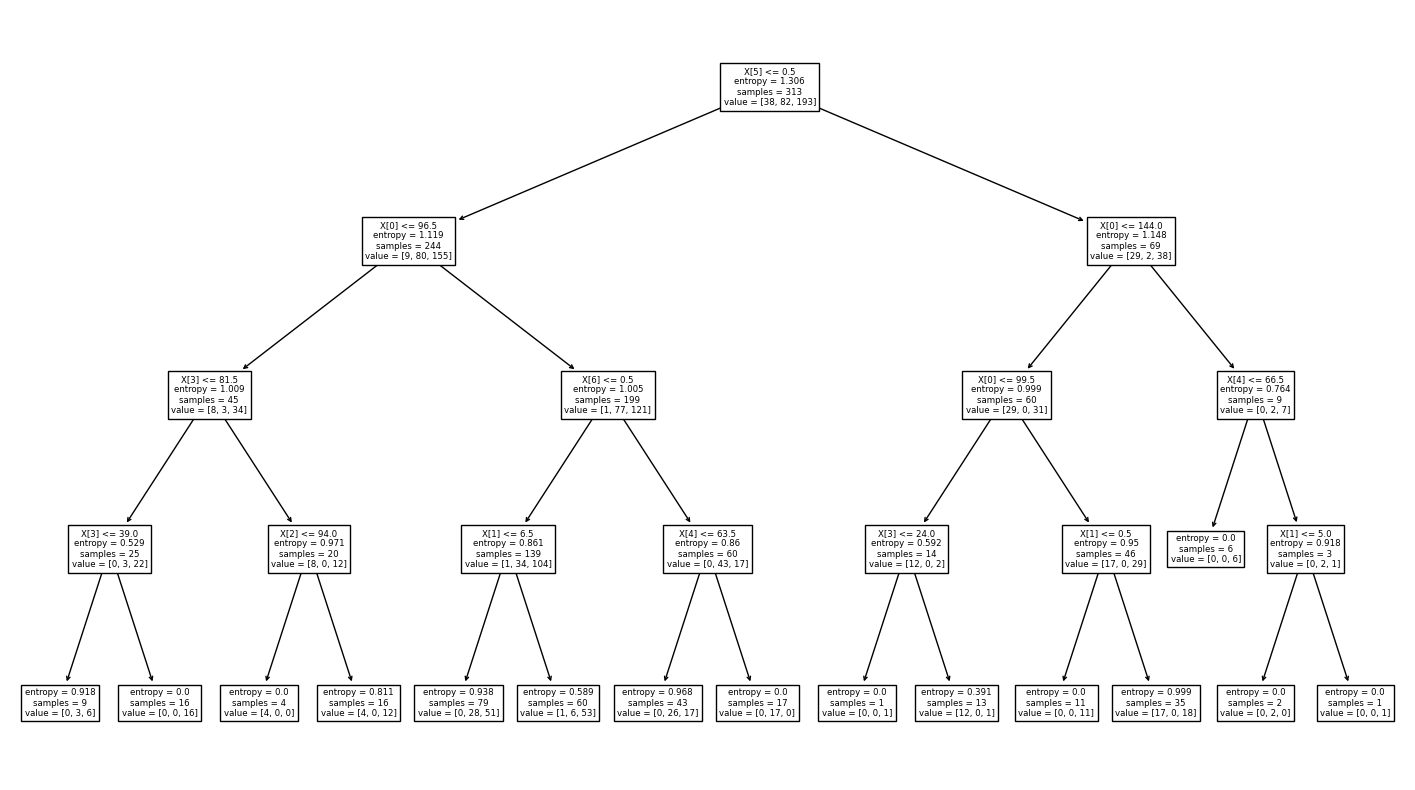

In [35]:
plt.figure(figsize=(18,10)) 
tree.plot_tree(model)
plt.show() 

# b) using Gini Criteria with train test split

In [36]:
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=4) 

In [37]:
model_gini.fit(x_train, y_train) 

DecisionTreeClassifier(max_depth=4)

In [38]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(pred==y_test) 

0.6329113924050633

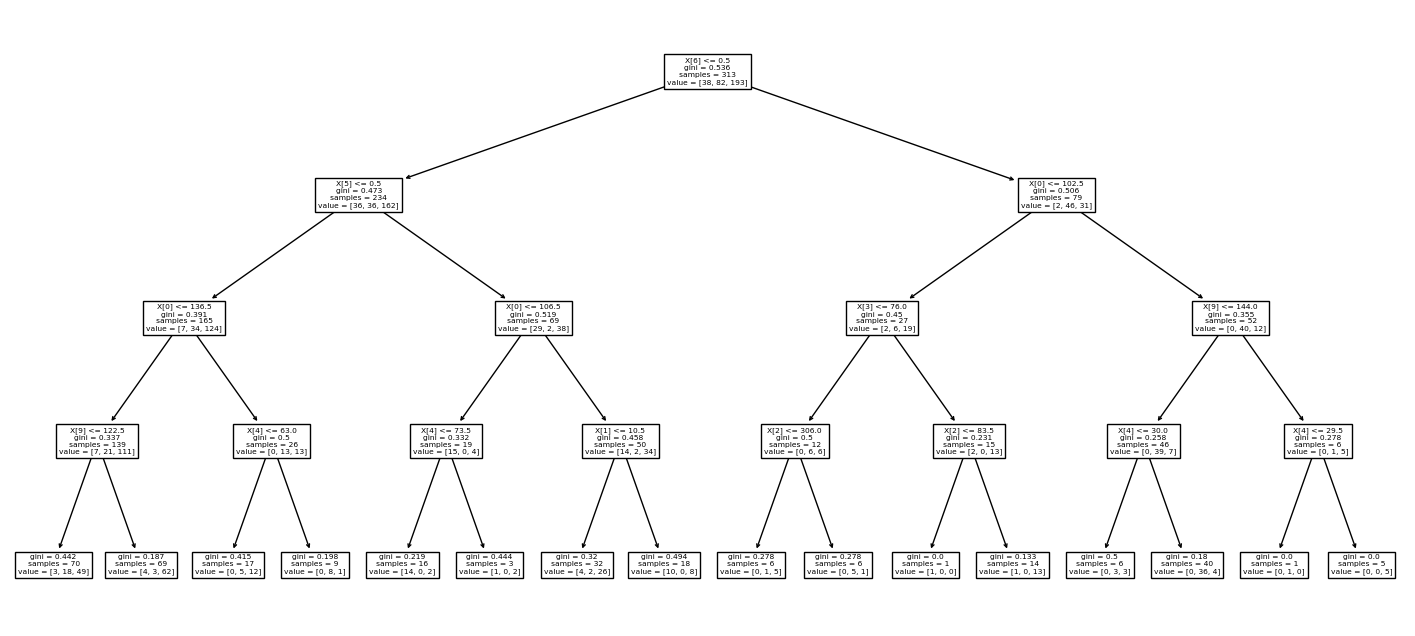

In [39]:
plt.figure(figsize=(18,8))
tree.plot_tree(model_gini)
plt.show() 
     

# c) Grid search for hyper parameter tuning

In [40]:
kfold = KFold(n_splits=10, shuffle=True)  
     

In [41]:
param_dict = {
    "criterion":["gini","entropy"],
    "max_depth":range(1,10),
    "min_samples_split":range(1,10),
    "min_samples_leaf":range(1,10)
}
     

In [42]:
DT = DecisionTreeClassifier()
grid = GridSearchCV(DT, param_grid=param_dict, cv=kfold)

grid.fit(model_data_x, model_data_y) 

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(1, 10)})

In [43]:
print(grid.best_score_)
print(grid.best_params_)

0.7066025641025642
{'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 4, 'min_samples_split': 8}


# d) Building final model on grid.best_params_ parameters

In [44]:
model_kf =grid.best_estimator_
model_kf.fit(model_data_x, model_data_y)

results = cross_val_score(model_kf, model_data_x, model_data_y, cv=kfold)
print('Accuracy with k fold validation is', np.round(results.mean(),3)) 

Accuracy with k fold validation is 0.684


In [45]:
model = grid.best_estimator_ 

pred=model.predict(x_test)
print('Accuracy with train test split:', accuracy_score(y_test, pred)) 

Accuracy with train test split: 0.810126582278481


In [46]:
model

DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=4,
                       min_samples_split=8)

In [47]:
print(classification_report(y_test, pred)) 

              precision    recall  f1-score   support

           0       0.80      0.50      0.62         8
           1       0.74      0.74      0.74        19
           2       0.84      0.88      0.86        52

    accuracy                           0.81        79
   macro avg       0.79      0.71      0.74        79
weighted avg       0.81      0.81      0.81        79



<AxesSubplot:>

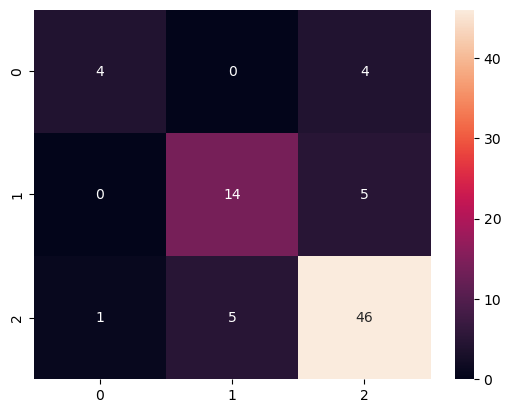

In [48]:
sns.heatmap(confusion_matrix(y_test, pred), annot=True) 

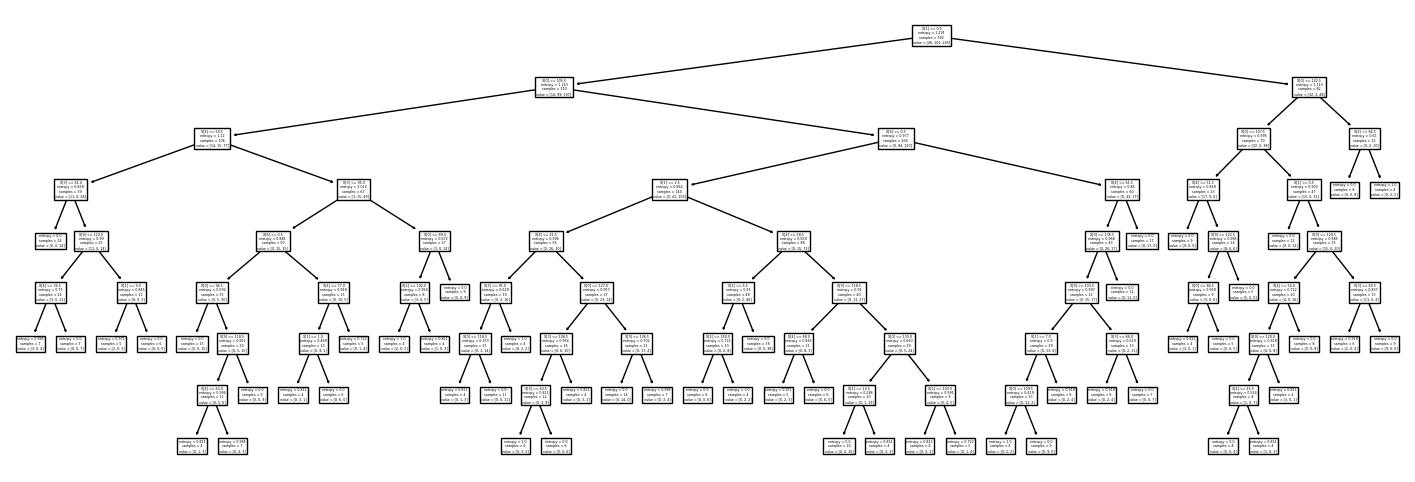

In [49]:
#PLot the decision tree
plt.figure(figsize=(18,6))
tree.plot_tree(model)

plt.show()

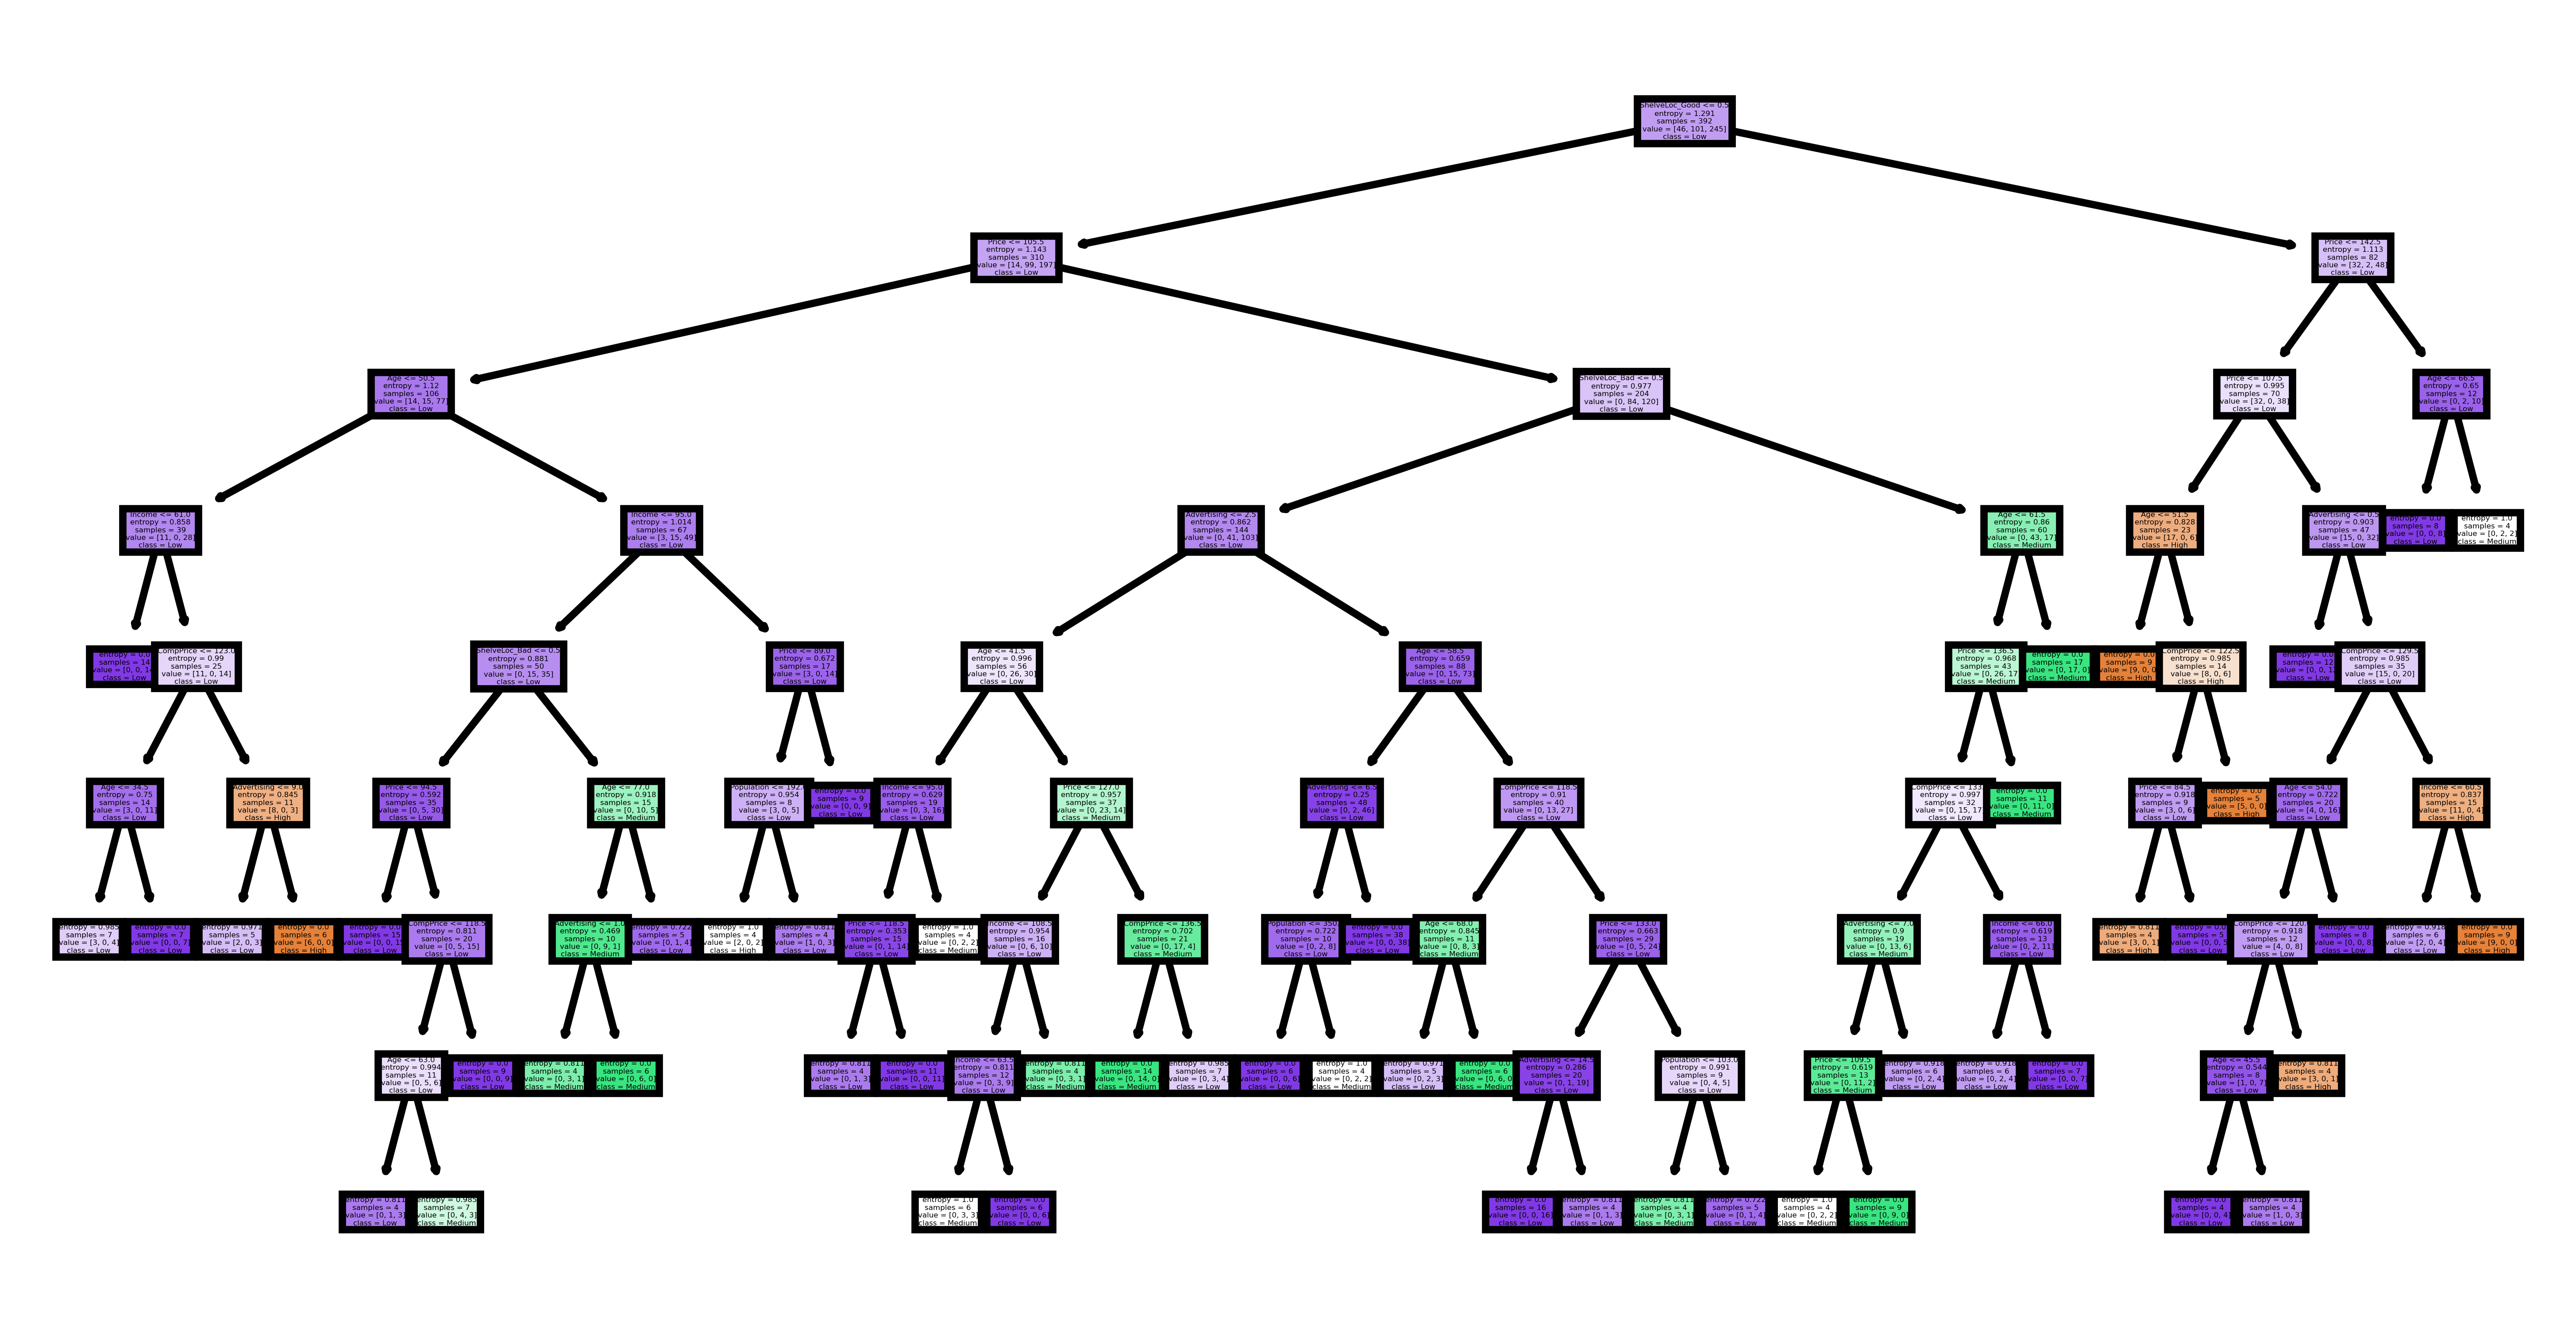

In [50]:
fn=['Price','Advertising','Population','Income','Age','ShelveLoc_Good','ShelveLoc_Bad','ShelveLoc_Medium','US_No','CompPrice']
cn=['High', 'Medium', 'Low']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,3), dpi=1200)
tree.plot_tree(model_kf,
               feature_names = fn, 
               class_names=cn,
               filled = True);
plt.savefig('tree.png',format='png',bbox_inches = "tight") 